In [1]:
from os.path import join, isdir
from os import sep, getcwd, chdir
from ExperimentSettings import EXPERIMENT_SETTINGS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Imports from parent directory
original_cur_dir = getcwd()
chdir('..')
from ResultsAnalyzer import ResultsAnalyzer
# Go back to current directory
chdir(original_cur_dir)

# General configuration

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
experiment_main_dir = 'Experiment'
anom_comm_names = [f'AnomComm000000000{str(i+1).zfill(2)}' for i in range(0, 10)]
meta_feature = 'normality_prob_std'

In [5]:
res_analyzer = ResultsAnalyzer(experiment_main_dir, EXPERIMENT_SETTINGS, anom_comm_names)

# Compare to baselines

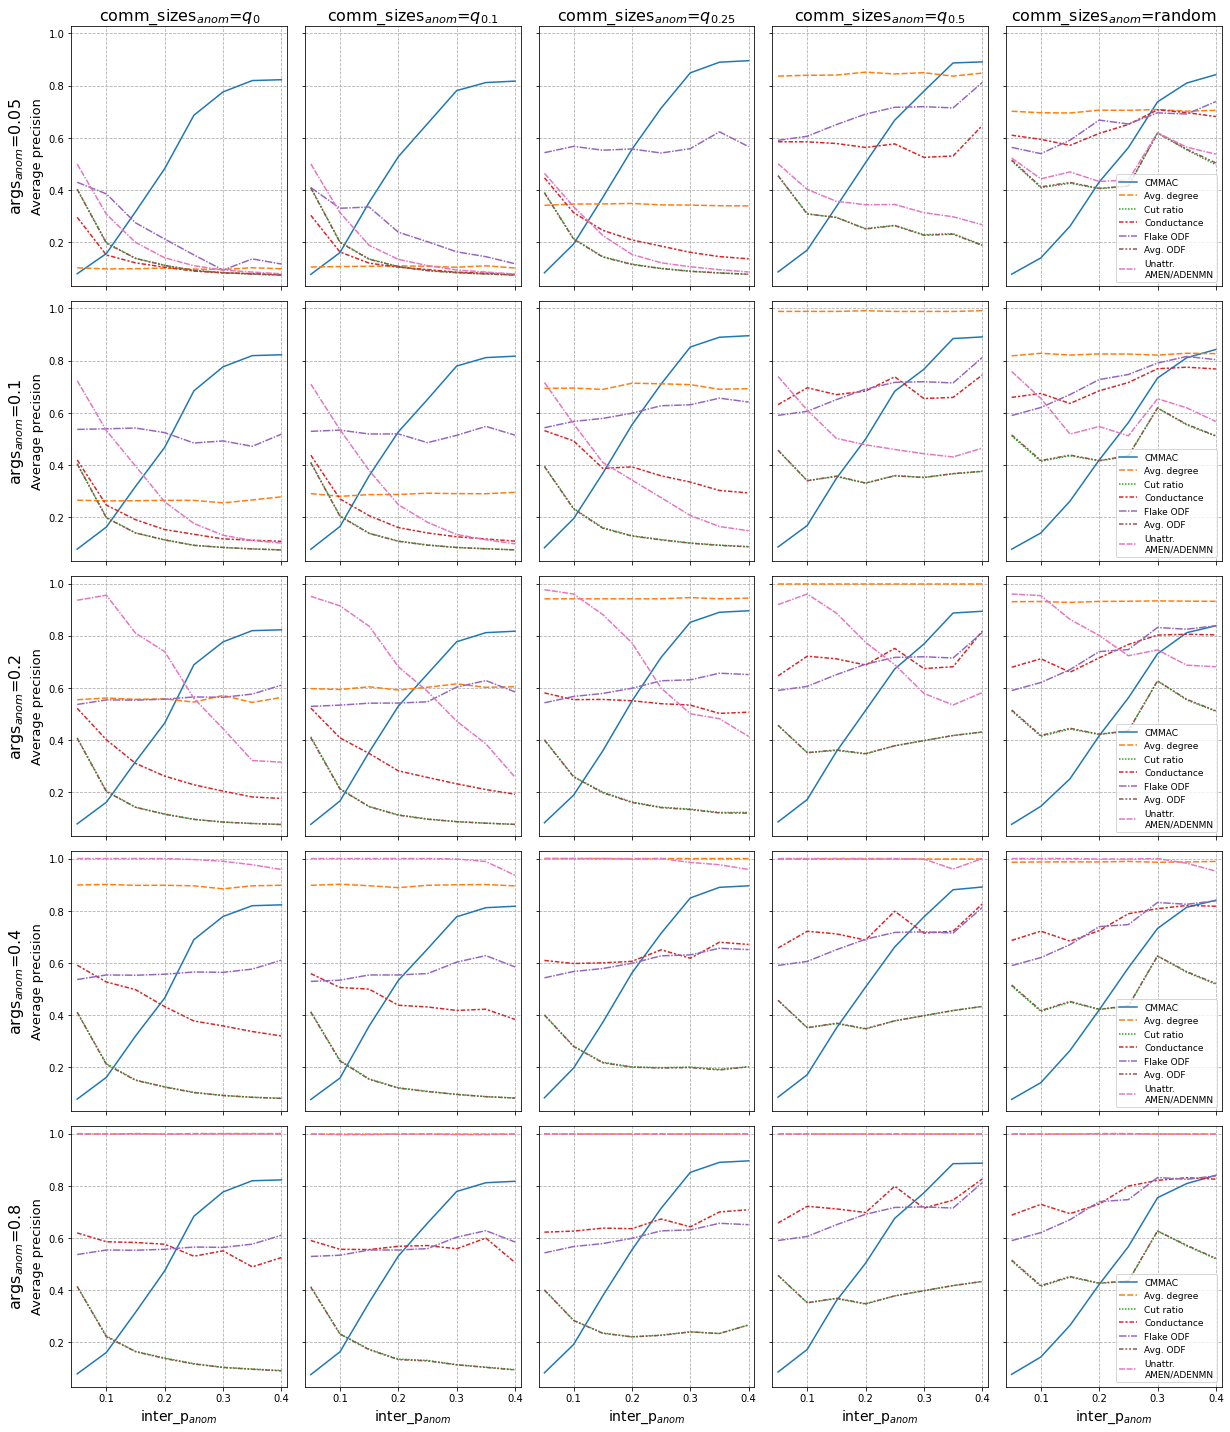

In [6]:
res_analyzer.plot_baseline_comparison(meta_feature=meta_feature, reverse=False)

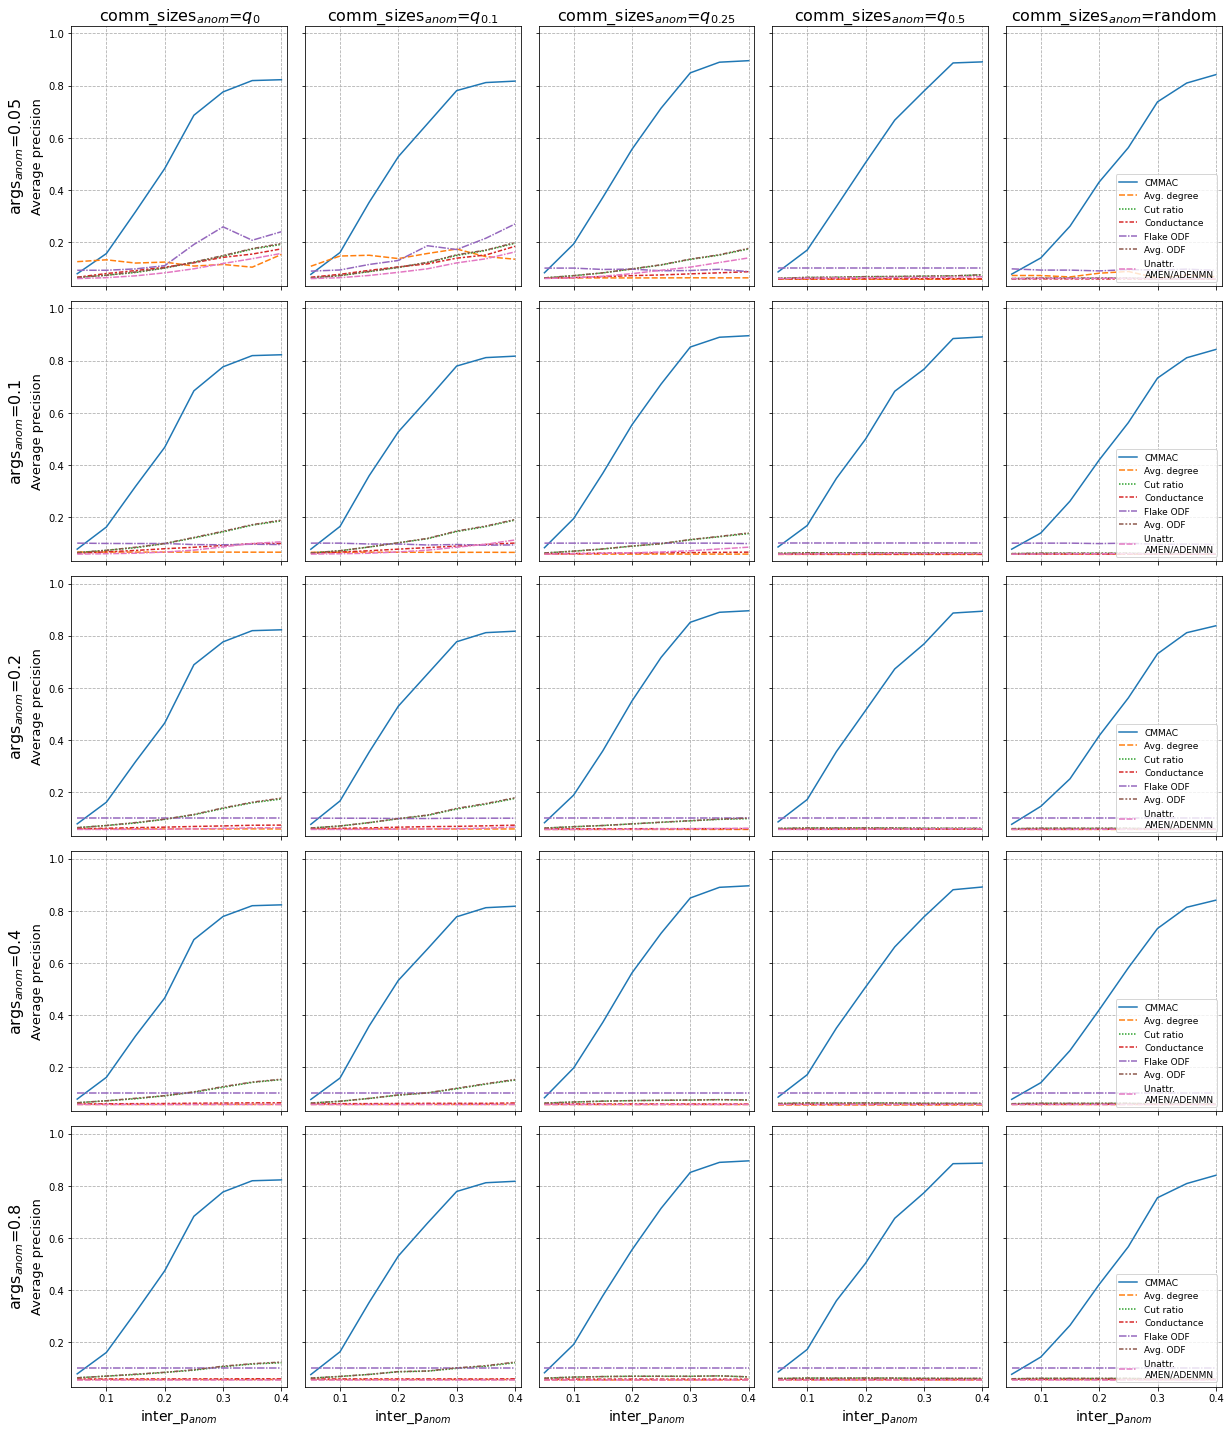

In [7]:
res_analyzer.plot_baseline_comparison(meta_feature=meta_feature, reverse=True)

In [8]:
from ResultsAnalyzer import _ALL_PS, _ALL_SIZE_GROUPS, _ALL_MS
from tqdm.autonotebook import tqdm

In [9]:
output = []
for p in tqdm(_ALL_PS):
    for size_group in tqdm(_ALL_SIZE_GROUPS, leave=False):
        for m in _ALL_MS:
            exp_dir_path = res_analyzer._ordered_dir_paths[f'p{p:.2f}'][size_group][f'm{m:.2f}']

            my_results = res_analyzer.create_single_experiment_results_analysis_df(dir_path=exp_dir_path, algo='OurResults')[['normality_prob_std']]
            my_results.rename({'normality_prob_std': 'CMMAC'}, axis=1, inplace=True)
            my_results.reset_index(drop=True, inplace=True)
            baseline_results = res_analyzer.create_single_experiment_results_analysis_df(dir_path=exp_dir_path, algo='BaselineResults', reverse=False)
            baseline_results.reset_index(drop=True, inplace=True)
            results = pd.concat([my_results, baseline_results], axis=1)
            
            results_dict = results.to_dict(orient='index')
            results_dict = {(p, size_group, m, k+1): v for k,v in results_dict.items()}
            
            scores_df = pd.DataFrame.from_dict(results_dict, orient='index')
            scores_df.reset_index(inplace=True)
            scores_df.rename({
                'level_0': '$inter\_p_{anom}$',
                'level_1': '$comm\_sizes_{anom}$',
                'level_2': '$args_{anom}$',
                'level_3': 'network_num'}, axis=1, inplace=True)
            
            scores_df['$comm\_sizes_{anom}$'] = pd.Categorical(
                scores_df['$comm\_sizes_{anom}$'],
                categories=['min', 'quantile10', 'quartile1', 'median', 'random'],
                ordered=True)
            scores_df.sort_values('$comm\_sizes_{anom}$', inplace=True)
            
            output.append(scores_df)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
concat_scores = pd.concat(output)

In [11]:
concat_scores = concat_scores.set_index(['$inter\_p_{anom}$', '$comm\_sizes_{anom}$', '$args_{anom}$', 'network_num'])

In [12]:
algo_name_mapper = {
    'CMMAC': '$CMMAC$',
    'OurAlgorithm': '$CMMAC$',
    'avg_degree': '$Avg. degree$',
    'cut_ratio': '$Cut ratio$',
    'conductance': '$Conductance$',
    'flake_odf': '$Flake ODF$',
    'avg_odf': '$Avg. ODF$',
    'unattr_amen': '$Unattr. AMEN/ADENMN$'
}

In [13]:
algo_name_mapper = {
    'CMMAC': 'CMMAC',
    'OurAlgorithm': 'CMMAC',
    'avg_degree': 'Avg. degree',
    'cut_ratio': 'Cut ratio',
    'conductance': 'Conductance',
    'flake_odf': 'Flake ODF',
    'avg_odf': 'Avg. ODF',
    'unattr_amen': 'Unattr. \nAMEN/ADENMN'
}

In [14]:
concat_scores.rename(algo_name_mapper, axis=1, inplace=True)

In [15]:
concat_scores = pd.DataFrame(concat_scores.stack()).reset_index()

concat_scores = concat_scores.rename({'level_4': 'Method',0: 'Average precision'}, axis=1)

In [16]:
concat_scores

,$inter\_p_{anom}$,$comm\_sizes_{anom}$,$args_{anom}$,network_num,Method,Average precision
0,0.050,min,0.050,1,CMMAC,0.079
1,0.050,min,0.050,1,Avg. degree,0.109
2,0.050,min,0.050,1,Cut ratio,0.310
3,0.050,min,0.050,1,Conductance,0.217
4,0.050,min,0.050,1,Flake ODF,0.399
5,0.050,min,0.050,1,Avg. ODF,0.310
6,0.050,min,0.050,1,Unattr. \nAMEN/ADENMN,0.373
7,0.050,min,0.050,2,CMMAC,0.069
8,0.050,min,0.050,2,Avg. degree,0.095
9,0.050,min,0.050,2,Cut ratio,0.356


In [17]:
comm_size = 'quartile1'
args_anom = 0.1

to_display = concat_scores.loc[
    (concat_scores['$comm\_sizes_{anom}$']==comm_size) &
    (concat_scores['$args_{anom}$']==args_anom)
]

In [18]:
to_display.head()

,$inter\_p_{anom}$,$comm\_sizes_{anom}$,$args_{anom}$,network_num,Method,Average precision
385,0.050,quartile1,0.100,1,CMMAC,0.079
386,0.050,quartile1,0.100,1,Avg. degree,0.599
387,0.050,quartile1,0.100,1,Cut ratio,0.321
388,0.050,quartile1,0.100,1,Conductance,0.528
389,0.050,quartile1,0.100,1,Flake ODF,0.500


In [19]:
to_report = to_display.groupby(['Method', '$inter\_p_{anom}$']).aggregate({'Average precision': 'mean'}).reset_index()
to_report = to_report.pivot(index='$inter\_p_{anom}$', columns='Method', values='Average precision')
to_report.reset_index(inplace=True)

In [20]:
to_report.style.highlight_max(axis=1)

Method,$inter\_p_{anom}$,Avg. ODF,Avg. degree,CMMAC,Conductance,Cut ratio,Flake ODF,Unattr. AMEN/ADENMN
0,0.05,0.393447,0.693736,0.0824127,0.531474,0.394789,0.542647,0.716091
1,0.1,0.230853,0.6946,0.194064,0.492107,0.233199,0.566853,0.557539
2,0.15,0.15694,0.689606,0.367797,0.386693,0.159212,0.578279,0.409566
3,0.2,0.12726,0.713353,0.553637,0.392414,0.128331,0.598291,0.342056
4,0.25,0.11243,0.711162,0.710169,0.3581,0.113617,0.626966,0.274407
5,0.3,0.0996429,0.707817,0.852124,0.334278,0.100577,0.630603,0.20606
6,0.35,0.0913768,0.690146,0.889677,0.301923,0.092461,0.655935,0.163728
7,0.4,0.0859112,0.692428,0.895474,0.292578,0.0863351,0.641157,0.147509


In [21]:
print(to_report.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
Method &  \$inter\textbackslash \_p\_\{anom\}\$ &  Avg. ODF &  Avg. degree &  CMMAC &  Conductance &  Cut ratio &  Flake ODF &  Unattr. \textbackslash nAMEN/ADENMN \\
\midrule
0 &              0.050 &     0.393 &        0.694 &  0.082 &        0.531 &      0.395 &      0.543 &                  0.716 \\
1 &              0.100 &     0.231 &        0.695 &  0.194 &        0.492 &      0.233 &      0.567 &                  0.558 \\
2 &              0.150 &     0.157 &        0.690 &  0.368 &        0.387 &      0.159 &      0.578 &                  0.410 \\
3 &              0.200 &     0.127 &        0.713 &  0.554 &        0.392 &      0.128 &      0.598 &                  0.342 \\
4 &              0.250 &     0.112 &        0.711 &  0.710 &        0.358 &      0.114 &      0.627 &                  0.274 \\
5 &              0.300 &     0.100 &        0.708 &  0.852 &        0.334 &      0.101 &      0.631 &                  0.206 \\
6 &              0.3

In [22]:
to_display

,$inter\_p_{anom}$,$comm\_sizes_{anom}$,$args_{anom}$,network_num,Method,Average precision
385,0.050,quartile1,0.100,1,CMMAC,0.079
386,0.050,quartile1,0.100,1,Avg. degree,0.599
387,0.050,quartile1,0.100,1,Cut ratio,0.321
388,0.050,quartile1,0.100,1,Conductance,0.528
389,0.050,quartile1,0.100,1,Flake ODF,0.500
390,0.050,quartile1,0.100,1,Avg. ODF,0.319
391,0.050,quartile1,0.100,1,Unattr. \nAMEN/ADENMN,0.593
392,0.050,quartile1,0.100,2,CMMAC,0.092
393,0.050,quartile1,0.100,2,Avg. degree,0.767
394,0.050,quartile1,0.100,2,Cut ratio,0.320


In [23]:
_SIZE_GROUPS_DISPLAY_NAME_MAP = {
	'min': '$q_{0}$',
	'quantile10': '$q_{0.1}$',
	'quartile1': '$q_{0.25}$',
	'median': '$q_{0.5}$',
	'random': 'random',
}

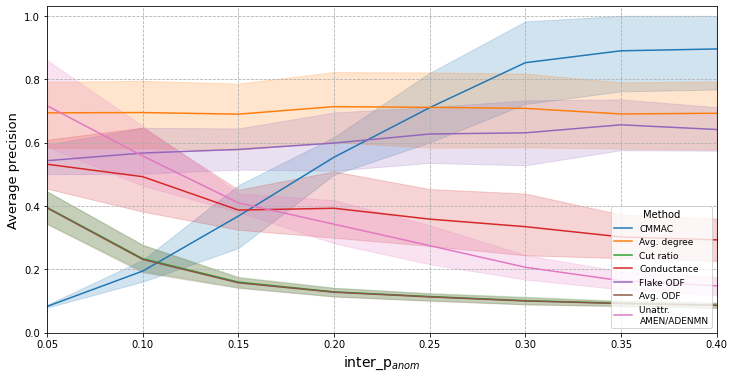

In [26]:
fig, ax = plt.subplots(1,1,figsize=(12, 6),tight_layout=False)


legend = 'full'
sns.lineplot(data=to_display, x='$inter\_p_{anom}$', y='Average precision', hue='Method', ax=ax , dashes=True, legend=legend)


ax.set_xlabel('inter_p$_{anom}$', fontsize=14)
ax.grid(ls='--')
#ax.text(-0.07, 0.53, "args$_{anom}$=" + f"{m}", size=16, verticalalignment='center', rotation=90)
ax.set_ylabel("Average precision", fontsize=13)


#ax.set_title("comm_sizes$_{anom}$=" + f"{_SIZE_GROUPS_DISPLAY_NAME_MAP[size_group]}", fontsize=16)



plt.setp(ax, ylim=(0.0, 1.03), xlim=(0.05, 0.4))

plt.show()

<AxesSubplot:xlabel='$args_{anom}$', ylabel='Average precision'>

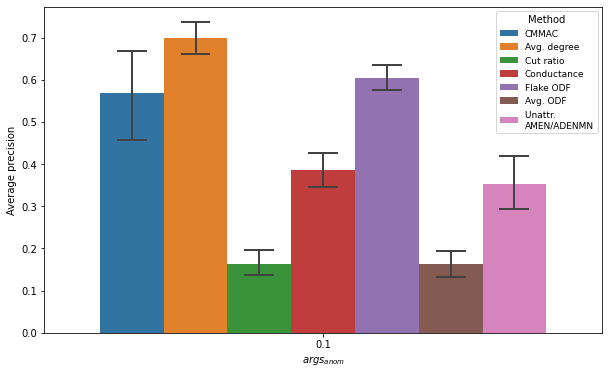

In [225]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(
    x='$args_{anom}$',
    y='Average precision',
    hue='Method',
    data=to_display,
    ax=ax,
    dodge=True, errwidth=2, capsize=0.05)

In [238]:
concat_scores.columns

Index(['$inter\_p_{anom}$', '$comm\_sizes_{anom}$', '$args_{anom}$',
       'network_num', 'Method', 'Average precision'],
      dtype='object')

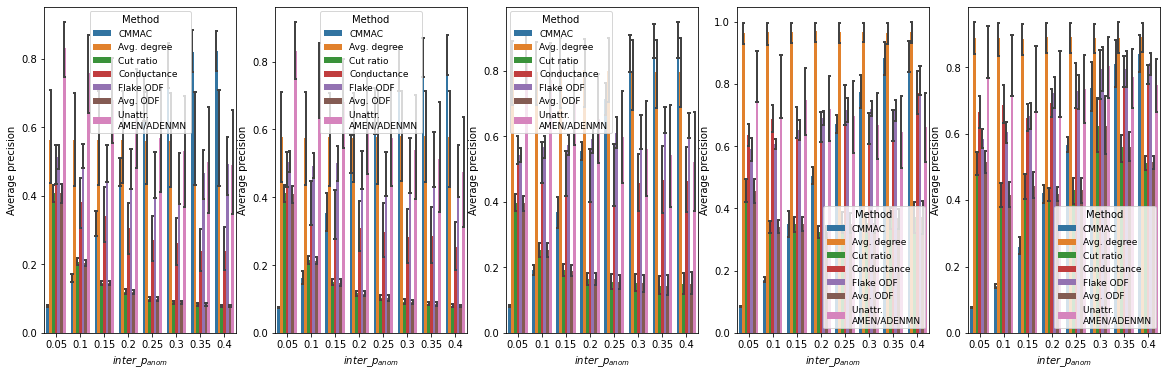

In [261]:
fig, axes = plt.subplots(1, 5, figsize=(20,6))
for i, size in enumerate(concat_scores['$comm\_sizes_{anom}$'].unique()):
    temp = concat_scores.loc[concat_scores['$comm\_sizes_{anom}$']==size]
    
    sns.barplot(
        x='$inter\_p_{anom}$',
        y='Average precision',
        hue='Method',
        data=temp,
        ax=axes[i],
        dodge=True, errwidth=2, capsize=0.05)
    

In [262]:
temp = concat_scores.loc[concat_scores['$comm\_sizes_{anom}$']=='min']

(<AxesSubplot:xlabel='$inter\\_p_{anom}$', ylabel='Average precision'>,)

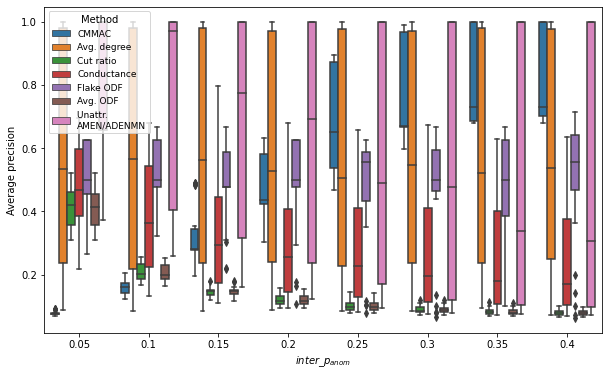

In [268]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(
    x='$inter\_p_{anom}$',
    y='Average precision',
    hue='Method',
    data=temp,
    ax=ax),
#    dodge=True, errwidth=2, capsize=0.05)

In [254]:
concat_scores

,$inter\_p_{anom}$,$comm\_sizes_{anom}$,$args_{anom}$,network_num,Method,Average precision
0,0.050,min,0.050,1,CMMAC,0.079
1,0.050,min,0.050,1,Avg. degree,0.109
2,0.050,min,0.050,1,Cut ratio,0.310
3,0.050,min,0.050,1,Conductance,0.217
4,0.050,min,0.050,1,Flake ODF,0.399
5,0.050,min,0.050,1,Avg. ODF,0.310
6,0.050,min,0.050,1,Unattr. \nAMEN/ADENMN,0.373
7,0.050,min,0.050,2,CMMAC,0.069
8,0.050,min,0.050,2,Avg. degree,0.095
9,0.050,min,0.050,2,Cut ratio,0.356


# Create a table - at each subplut - where am i getting better

#### averaging over the 5 networks

In [346]:
a = concat_scores.groupby(['$comm\_sizes_{anom}$', '$args_{anom}$', '$inter\_p_{anom}$', 'Method']).aggregate({'Average precision': 'mean'}).reset_index()

In [347]:
#a.pivot(index='$args_{anom}$', columns='$comm\_sizes_{anom}$', values='Average precision')

In [348]:
temp = a.loc[(a['$comm\_sizes_{anom}$']=='random') & (a['$args_{anom}$']==0.1) & (a['$inter\_p_{anom}$']==0.4)]
x(temp)

'CMMAC'

#### find best method for set of paramaters

In [349]:
def x(temp_df):
    return temp_df.loc[temp_df['Average precision'].idxmax(), 'Method']

In [350]:
a = a.groupby(['$comm\_sizes_{anom}$', '$args_{anom}$', '$inter\_p_{anom}$']).apply(x)

In [351]:
a = pd.DataFrame(a)

In [352]:
a = a.reset_index().rename({0:'Method'},axis=1)

#### leaving only CMMAC

In [353]:
a = a.loc[a['Method']=='CMMAC']

#### finding min inter_p value

In [354]:
a = a.groupby(['$comm\_sizes_{anom}$', '$args_{anom}$']).aggregate({'$inter\_p_{anom}$': 'min'}).reset_index()

In [355]:
a

,$comm\_sizes_{anom}$,$args_{anom}$,$inter\_p_{anom}$
0,min,0.050,0.150
1,min,0.100,0.250
2,min,0.200,0.250
3,quantile10,0.050,0.150
4,quantile10,0.100,0.200
5,quantile10,0.200,0.250
6,quartile1,0.050,0.250
7,quartile1,0.100,0.300
8,median,0.050,0.350
9,random,0.050,0.300


In [356]:
for m in concat_scores['$args_{anom}$'].unique():
    if m in a['$args_{anom}$'].unique():
        continue
    a = a.append({'$comm\_sizes_{anom}$': 'min', '$args_{anom}$':m}, ignore_index=True)

In [357]:
concat_scores['$args_{anom}$'].unique()

array([0.05, 0.1 , 0.2 , 0.4 , 0.8 ])

In [359]:
a = a.pivot(index='$args_{anom}$', columns='$comm\_sizes_{anom}$', values='$inter\_p_{anom}$')

In [360]:
_SIZE_GROUPS_DISPLAY_NAME_MAP = {
	'min': '$q_{0}$',
	'quantile10': '$q_{0.1}$',
	'quartile1': '$q_{0.25}$',
	'median': '$q_{0.5}$',
	'random': 'random',
}

In [361]:
a = a.rename(_SIZE_GROUPS_DISPLAY_NAME_MAP, axis=1)

In [362]:
a = a[['$q_{0}$', '$q_{0.1}$', '$q_{0.25}$', '$q_{0.5}$', 'random']]

In [363]:
a

$comm\_sizes_{anom}$,$q_{0}$,$q_{0.1}$,$q_{0.25}$,$q_{0.5}$,random
$args_{anom}$,,,,,
0.050,0.150,0.150,0.250,0.350,0.300
0.100,0.250,0.200,0.300,nan,0.400
0.200,0.250,0.250,nan,nan,nan
0.400,nan,nan,nan,nan,nan
0.800,nan,nan,nan,nan,nan


# same but ignoring avg degree

In [331]:
concat_scores.shape

(7000, 6)

In [330]:
#### averaging over the 5 networks
a = concat_scores.loc[concat_scores['Method']!='Avg. degree']
print(a.shape)
a = a.groupby(['$comm\_sizes_{anom}$', '$args_{anom}$', '$inter\_p_{anom}$', 'Method']).aggregate({'Average precision': 'mean'}).reset_index()

#### find best method for set of paramaters

def x(temp_df):
    return temp_df.loc[temp_df['Average precision'].idxmax(), 'Method']

a = a.groupby(['$comm\_sizes_{anom}$', '$args_{anom}$', '$inter\_p_{anom}$']).apply(x)

a = pd.DataFrame(a)

a = a.reset_index().rename({0:'Method'},axis=1)

#### leaving only CMMAC

a = a.loc[a['Method']=='CMMAC']

####finding min inter_p value

a = a.groupby(['$comm\_sizes_{anom}$', '$args_{anom}$']).aggregate({'$inter\_p_{anom}$': 'min'}).reset_index()

a.pivot(index='$args_{anom}$', columns='$comm\_sizes_{anom}$', values='$inter\_p_{anom}$')

(6000, 6)


$comm\_sizes_{anom}$,min,quantile10,quartile1,median,random
$args_{anom}$,,,,,
0.050,0.150,0.150,0.250,0.300,0.300
0.100,0.250,0.200,0.250,0.300,0.400
0.200,0.250,0.250,0.250,0.300,nan
